In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [7]:
df= pd.read_csv('AIML Dataset.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.shape

(6362620, 11)

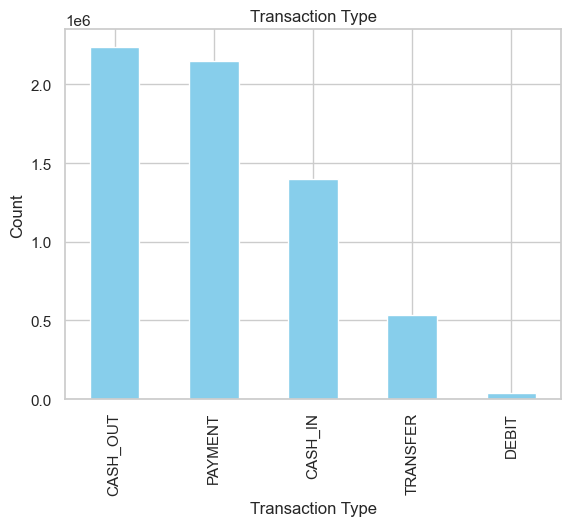

In [14]:
df['type'].value_counts().plot(kind='bar',title='Transaction Type',color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

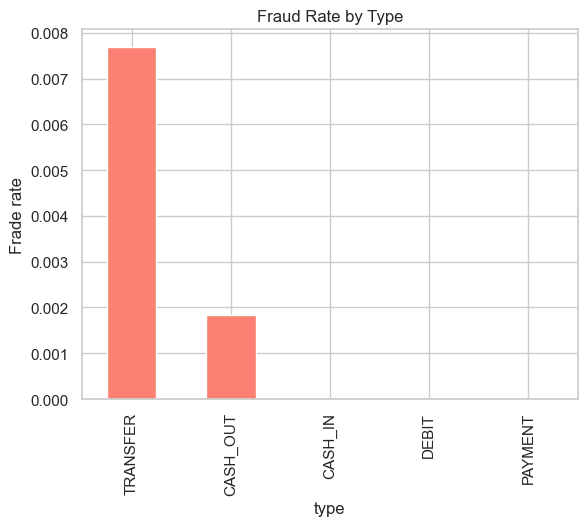

In [15]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title='Fraud Rate by Type',color='salmon')
plt.ylabel('Frade rate')
plt.show

In [16]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

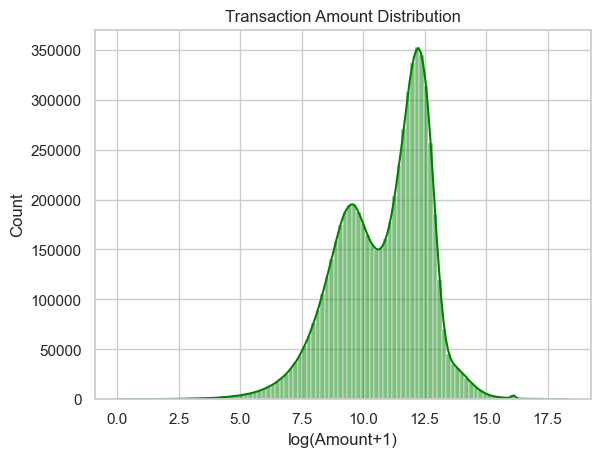

In [17]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color= 'green')
plt.title('Transaction Amount Distribution')
plt.xlabel("log(Amount+1)")
plt.show()

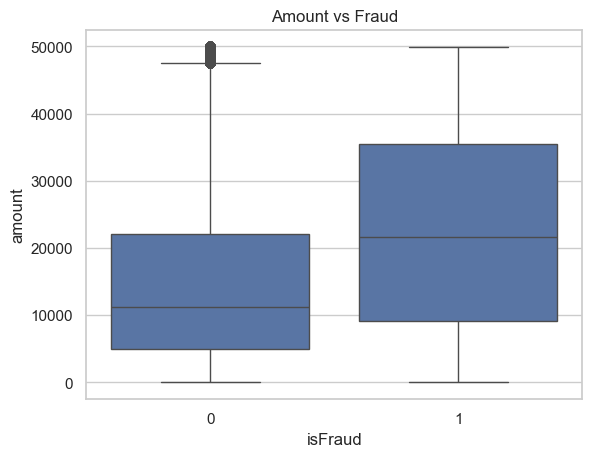

In [18]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('Amount vs Fraud')
plt.show()

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
df['BalanceDiffOrig']= df['oldbalanceOrg']-df['newbalanceOrig']
df['BalanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [21]:
(df['BalanceDiffOrig']<0).sum()

1399253

In [22]:
(df['BalanceDiffDest']<0).sum()

1238864

In [23]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrig,BalanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


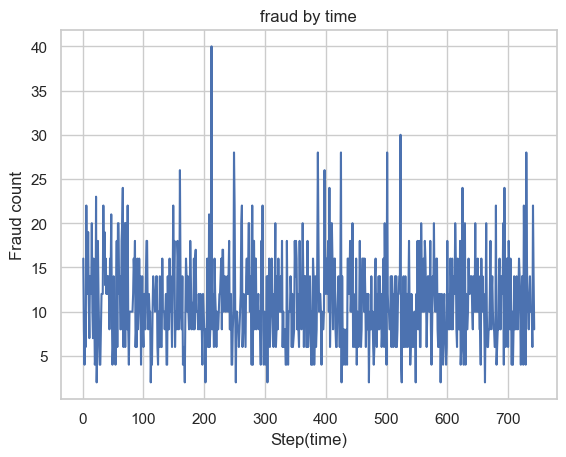

In [24]:
fraud_per_step= df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values, label='fraud_per_step')
plt.xlabel('Step(time)')
plt.ylabel('Fraud count')
plt.title('fraud by time')
plt.show()

In [25]:
df.drop(columns='step',inplace= True)

In [26]:
Top_sender= df['nameOrig'].value_counts().head(10)

In [27]:
Top_sender

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [28]:
Top_receiver= df['nameDest'].value_counts().head(10)

In [29]:
Top_receiver

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [30]:
fraud_user=df[df['isFraud']==1]['nameOrig'].value_counts().sort_index()

In [31]:
fraud_user

nameOrig
C1000036340    1
C1000086512    1
C1000331499    1
C1000484178    1
C1000513158    1
              ..
C998715487     1
C998785780     1
C998822926     1
C999561448     1
C99979309      1
Name: count, Length: 8213, dtype: int64

In [32]:
fraud_type=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [33]:
fraud_type

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrig,BalanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


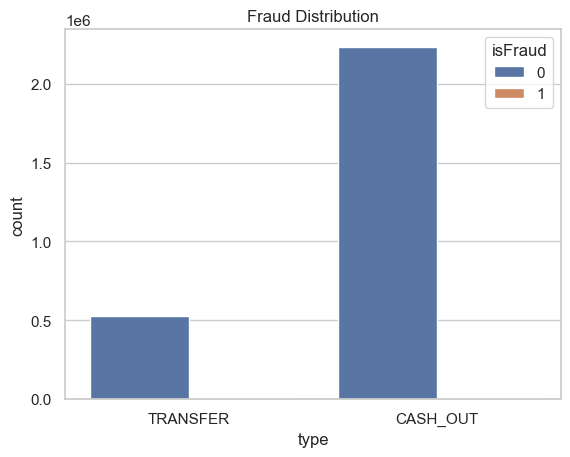

In [34]:
sns.countplot(data=fraud_type,x='type', hue='isFraud')
plt.title('Fraud Distribution')
plt.show()

In [35]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0) &
    (df['newbalanceDest']==0) &
    (df['type'].isin(['TRANSFER,CASH_OUT']))
]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [37]:
df_model= df.drop(['nameOrig', 'nameDest','isFlaggedFraud'], axis=1)

In [38]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalanceDiffOrig,BalanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [39]:
categorical= ['type']
numeric= ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [40]:
y= df_model['isFraud']
X= df_model.drop("isFraud",axis=1)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)])

In [43]:
from xgboost import XGBClassifier

In [44]:
 clf_pipeline =Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


In [45]:
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


In [48]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'))
], voting='soft')

clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])


In [ ]:
XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('xgb',
                                               XGBClassifier(base_score=No...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                  voting='soft'))])

In [51]:
y_pred= clf_pipeline.predict(X_test)

In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271262
           1       0.76      0.97      0.85      1262

    accuracy                           1.00   1272524
   macro avg       0.88      0.99      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [53]:
confusion_matrix(y_test,y_pred)

array([[1270870,      34],
       [    392,    1228]], dtype=int64)

In [54]:
clf_pipeline.score(X_test,y_test)

0.9996652322470931

In [55]:
import joblib
joblib.dump(clf_pipeline,'Fraud Detection.pkl')

['Fraud Detection.pkl']

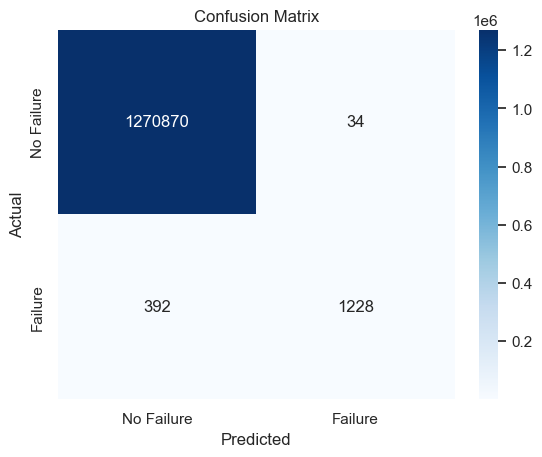

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

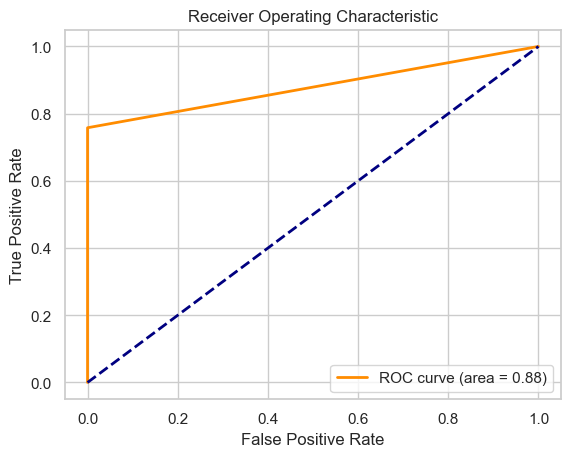

In [59]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

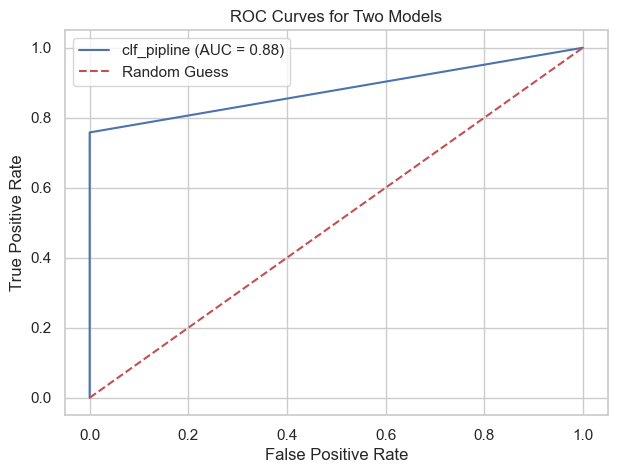

In [57]:
plt.figure(figsize=(7, 5))

for model in ['clf_pipline']:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()